In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

----
# Задание 1
----

# Случайная величина, моделирующая распределение Bi(5, 0.5)

In [2]:
def Y():
    tmp = np.random.random(size = 5)
    for i in range(5):
        # Непрерывность слева
        if tmp[i] >= 0.5:
            tmp[i] = 1;
        else:
            tmp[i] = 0;
    
    return tmp.sum()

In [3]:
def Task1(len = 100):
    a = np.zeros((len))
    for i in range(len):
        a[i] = Y()
    
    b = np.random.binomial(5, 0.5, (len))
    plt.plot(a)
    plt.plot(b)
    plt.title("Выборка длины "+str(len))
    plt.legend(["Смоделированная выборка", "Теоретическая выборка"])
    plt.savefig("./Task1/Task_1__all_"+str(len)+'.png')
    plt.show()
    
    own = np.zeros((6))
    for i in range(len):
        own[int(a[i])] += 1

    own /= len

    binom = np.zeros((6))
    for i in range(len):
        binom[int(b[i])] += 1

    binom /= len
    
    plt.plot(own)
    plt.plot(binom)
    plt.legend(["Смоделированное биномиальное распределение", 
            "Теоретическое биномиальное распределение"])
    plt.title("Биномиальное распределение длины "+str(len))
    plt.savefig("./Task1/Task_1_Binom"+str(len)+".png")
    plt.show()
    
    # Среднее
    s = a.sum() / len
    print("Выборочное среднее "+str(s))
    
    s_bin = b.sum() / len
    print("Теоретическое среднее "+str(s_bin))
    
    # Дисперсия
    s_sqrt = (a*a).sum()/len
    disp = s_sqrt - s**2
    print("Дисперсия смоделированной выборки " + str(disp))
    
    s_bin_sqrt = (b*b).sum()/len
    disp_bin = s_bin_sqrt - s_bin**2
    print("Теоретическое значение дисперсии " + str(disp_bin))

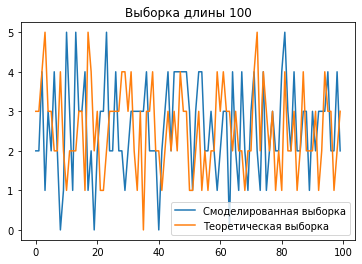

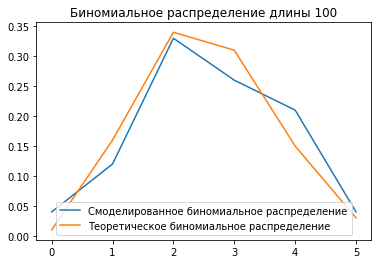

Выборочное среднее 2.6
Теоретическое среднее 2.52
Дисперсия смоделированной выборки 1.38
Теоретическое значение дисперсии 1.1095999999999995


In [4]:
Task1()

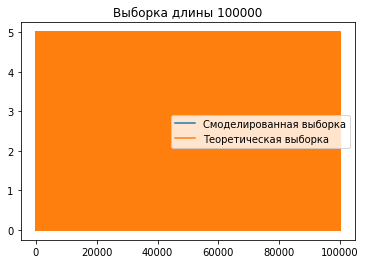

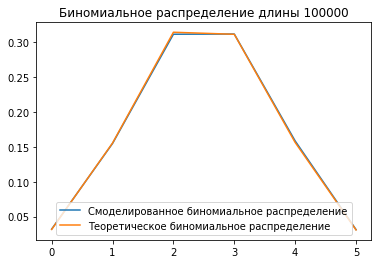

Выборочное среднее 2.50395
Теоретическое среднее 2.498
Дисперсия смоделированной выборки 1.2560643974999994
Теоретическое значение дисперсии 1.2472359999999991


In [5]:
Task1(100000)

# Задание 2
# Стандартное распределение Коши C(0, 1)

In [6]:
def C():
    return np.tan(np.pi*(np.random.random() - 0.5))

In [11]:
def emper(x, c):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        #for i in range(len(c)):
        tmp = c < x[j]
        ans[j] = tmp.sum()
            #if x[j] > c[i]:
            #    ans[j] += 1
    
    ans = ans/len(ans)
    return ans

In [13]:
def n(N = 100):
    #return int(np.sqrt(N))
    return min(1 + int(np.log2(N)), 13) #правило Стерджиса: n = 1+[log2N]

In [14]:
def h(x, n_c, result, mas, hist_len, length = 100):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j]
    
    ans /= (hist_len*length)
    return ans

In [10]:
def Task2(length = 100, width = 10):
    # Выборки
    c = np.zeros((length))
    for i in range(length):
        c[i] = C()

    d_cauch = np.random.standard_cauchy(size = (length))

    plt.plot(c)
    plt.plot(d_cauch)
    plt.title("Выборка длины " + str(length))
    plt.legend(["Смоделированная выборка", "Теоретическая выборка"])
    plt.savefig("./Task2/Task_2__all_"+str(length)+".png")
    plt.show()
    
    
    # Функции распределения
    start = int(min(c.min(), d_cauch.min())) - 1
    stop = int(max(c.max(), d_cauch.max())) + 1
    x = np.linspace(start = start, stop = stop, num = length)

    y_cauchy = lambda x: 1/np.pi * np.arctan(x) + 0.5
    
    plt.plot(x, y_cauchy(x))
    plt.plot(x, emper(x, c))
    plt.legend(["Теоретическое распределение", "Эмперическое распределение"])
    plt.title("Распределение C(0, 1) длины " + str(length))
    plt.savefig("./Task2/Task_2_Cauchy"+str(length)+".png")
    plt.show()
    
    # Гистограмма и плотность распределения
    n_c = n(length)
    hist_len = (x.max() - x.min())/(n_c)
    mas = np.zeros((n_c+1))

    for i in range(n_c):
        mas[i] = x.min() + hist_len*i
    mas[n_c] = x.max()
    result = np.zeros((n_c))
    for i in range(len(c)):
        for j in range(n_c):
            if c[i] <= mas[j+1] and c[i] > mas[j]:
                result[j] += 1
    
    plt.bar(x, h(x, n_c, result, mas, hist_len, length), width = width, color = 'teal')

    f = lambda x: 1/np.pi * (1/(x**2 + 1))

    plt.plot(x, f(x), color = 'salmon', linestyle = "--")
    plt.legend(["Плотность", "Гистограмма"])
    plt.title("Плотность и гистограмма длины " + str(length))
    plt.savefig("./Task2/Task_2_Density"+str(length)+".png")
    plt.show()
    
    #Медиана
    F_T = lambda x: np.tan(np.pi*(x-0.5))
    
    print("Теоретическое значение: ", F_T(0.5))
    print("Выборочная медиана: ", np.sort(c)[int(length/2) - 1])

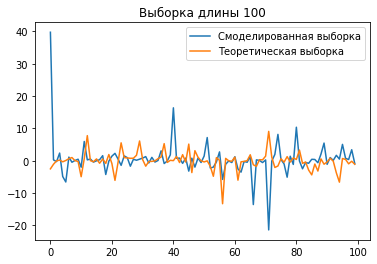

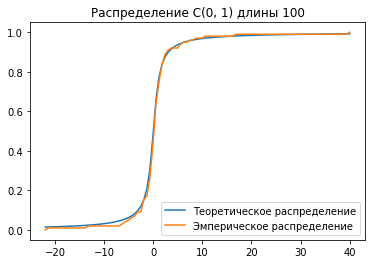

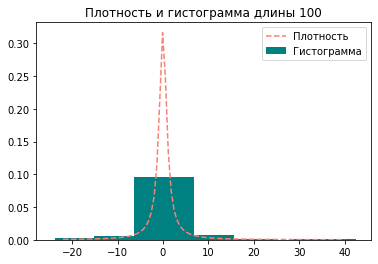

Теоретическое значение:  0.0
Выборочная медиана:  0.21787135837578478


In [11]:
Task2(width = 5)

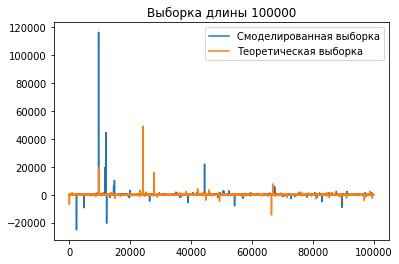

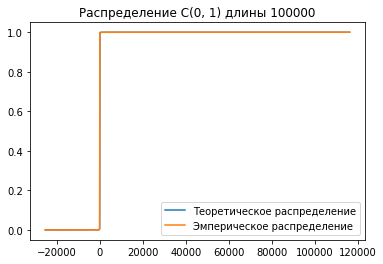

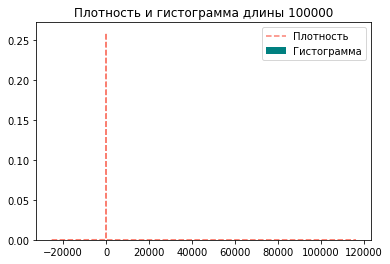

Теоретическое значение:  0.0
Выборочная медиана:  -0.0005758960784728971


In [12]:
Task2(100000, 1)

# Задание 3
# Использование задачи 8

In [13]:
# 5/16 2/16 3/16 1/16 5/16
# 1    0.5  2/3  2    6/5
def Gen():
    sector = np.random.uniform()

    position = np.random.uniform()

    #return position * sector
    if sector < 5/16:
        return position * 5/16 
    elif sector < 6/16:
        return position * 2/16 + 5/16
    elif sector < 8/16:
        return position * 3/16 + 7/16
    elif sector < 10/16:
        return position * 1/16 + 10/16
    elif sector < 1:
        return position * 5/16 + 11/16
    
    return 0

In [14]:
#Функция распределения
def func1(x):
    ans = np.zeros_like(x)
    
    a = 1/5
    b = 0
    for i in range(len(ans)):
        if x[i] < 0:
            b = 0
        elif x[i] < 5/16:
            b = x[i]
        elif x[i] < 7/16:
            b = 5/16 + 1/2 * (x[i] - 5/16)
        elif x[i] < 10/16:
            b = 6/16 + 2/3 * (x[i] - 7/16) 
        elif x[i] < 11/16:
            b = 8/16 + 2 * (x[i] - 10/16)
        elif x[i] < 1:
            b = 10/16 + 6/5 * (x[i] - 11/16)
        else:
            b = 1
        ans[i] = b
        b = 0
    return ans

In [79]:
# Гистограмма
def h1(x, n_c, result, mas):
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j] / (mas[j+1] - mas[j])
    
    ans /= len(x)
    return ans

In [16]:
# Плотность
def f(x):
    out = np.zeros_like(x)
    for i in range(len(x)):
        if x[i] < 0:
            out[i] = 0
        elif x[i] < 5/16:
            out[i] = 1
        elif x[i] < 7/16:
            out[i] = 0.5
        elif x[i] < 10/16:
            out[i] = 2/3
        elif x[i] < 11/16:
            out[i] = 2
        elif x[i] < 1:
            out[i] = 6/5
        else:
            out[i] = 0
    return out

In [17]:
def Task3(length = 100, width = 0.005):
    # Выборка
    e = np.zeros((length))

    for i in range(length):
        e[i] = Gen()
    
    plt.plot(e)
    plt.title("Выборка длины " + str(length))
    plt.legend(["Смоделированная выборка"])
    plt.savefig("./Task3/Task_3__all_"+str(length)+".png")
    plt.show()
    
    x_8 = np.linspace(start = 0.0, stop = 1.0, num = length)

    # Распределение
    test_func = lambda x: 2/3 * x  + 4/48
    emper_distrib = emper(x_8, e)
    theory_distrib = func1(x_8)
    
    plt.plot(x_8, emper_distrib, color = "green")
    plt.plot(x_8, func1(x_8))
    plt.plot(x_8, test_func(x_8), color = "olive")
    plt.legend(["Эмперическое", "Теоретическое", "y = 2/3 * x + 1/12"])
    plt.title("Функции распределения и прямая y=(2/3)*x+1/12 длины "+str(length))
    plt.savefig("./Task3/Task_3__distrib_"+str(length)+".png")
    plt.show()
    
    # Выборочные среднее и дисперсия и их теоретические значения
    E_emper = emper_distrib.sum()/length
    E_theor = theory_distrib.sum()/length
    print("Emper mean: " + str(E_emper))
    print("Theor mean: " + str(E_theor))
    
    E_emper2 = (emper_distrib*emper_distrib).sum()/length
    E_theor2 = (theory_distrib*theory_distrib).sum()/length
    D_emper = E_emper2 - E_emper**2
    D_theor = E_theor2 - E_theor**2
    print("Emper disp: " + str(D_emper))
    print("Theor disp: " + str(D_theor))
    
    # Гистограмма
    ## 1-ый способ
    n_c = 5
    hist_len = (x_8.max() - x_8.min())/(n_c)
    mas = np.array([0, 5/16, 7/16, 10/16, 11/16, 1])

    result = np.zeros((n_c))

    for i in range(len(e)):
        for j in range(n_c):
            if e[i] <= mas[j+1] and e[i] > mas[j]:
                result[j] += 1

    plt.bar(x_8, h1(x_8, n_c, result, mas), width = width, color = "sandybrown")

    # 5/16 2/16 3/16 1/16 5/16
    # 1    0.5  2/3  2    6/5

    plt.plot(x_8, f(x_8), color = "navy", linewidth = 3)
    plt.legend([ "Плотность", "Гистограмма",])
    plt.title("1-ый способ построения гистограммы длины " + str(length))
    plt.savefig("./Task3/Task_3__density1_"+str(length)+".png")
    plt.show()
    
    ## 2-ой способ
    n_c = 10
    hist_len = (x_8.max() - x_8.min())/(n_c)
    mas = np.array([0, 5/32, 5/16, 6/16, 7/16, 17/32, 10/16, 21/32, 11/16, 27/32, 1])

    result = np.zeros((n_c))

    for i in range(len(e)):
        for j in range(n_c):
            if e[i] <= mas[j+1] and e[i] > mas[j]:
                result[j] += 1
                
    plt.bar(x_8, h1(x_8, n_c, result, mas), width = width, color = "sandybrown")

    # 5/16 2/16 3/16 1/16 5/16
    # 1    0.5  2/3  2    6/5

    plt.plot(x_8, f(x_8), color = "navy", linewidth = 3)
    plt.legend([ "Плотность", "Гистограмма",])
    plt.title("2-ой способ построения гистограммы длины " + str(length))
    plt.savefig("./Task3/Task_3__density2_"+str(length)+".png")
    plt.show()

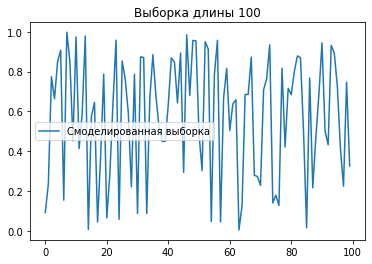

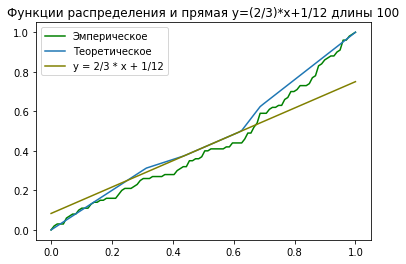

Emper mean: 0.4252
Theor mean: 0.4632670454545454
Emper disp: 0.07501495999999996
Theor disp: 0.07843229629324083


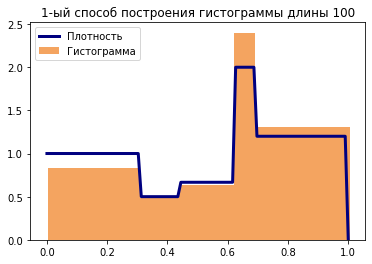

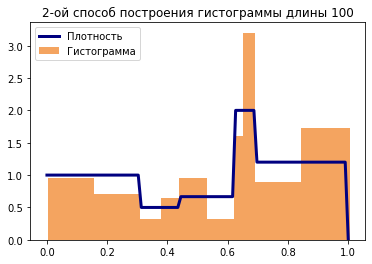

In [18]:
Task3(width = 0.0101)

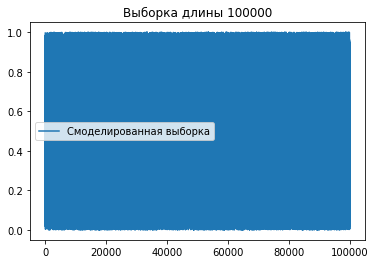

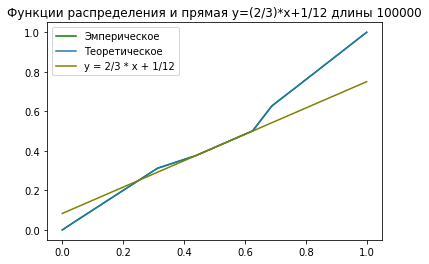

Emper mean: 0.4633432522
Theor mean: 0.462890996097461
Emper disp: 0.0766235435949392
Theor disp: 0.07666826120296805


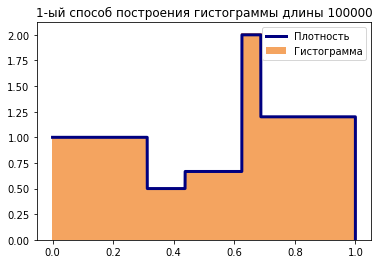

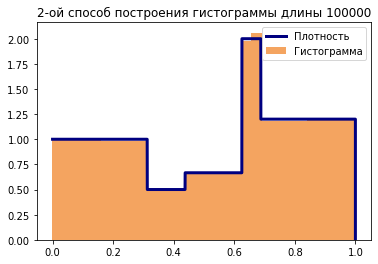

In [19]:
Task3(length = 100000)

# Задание 4

In [2]:
from scipy.special import erf

In [3]:
def N_4(len = 100):
    ans = np.zeros((len))
    for i in range(12):
        ans += np.random.uniform(size = (len))
    ans -= 6
    return ans 

In [4]:
def N_4_1(len = 100):
    ans = np.sqrt(-2*np.log(np.random.uniform(size = (len))))*np.sin(2*np.pi*np.random.uniform(size = (len)))
    return ans

In [5]:
def N_4_2(len = 100):
    ans = np.sqrt(-2*np.log(np.random.uniform(size = (len))))*np.cos(2*np.pi*np.random.uniform(size = (len)))
    return ans

In [6]:
def h4(x, n_c, c, mas, hist_len,):
    result = np.zeros((n_c))
    for i in range(len(c)):
        for j in range(n_c):
            if c[i] <= mas[j+1] and c[i] > mas[j]:
                result[j] += 1
    ans = np.zeros_like(x)
    for i in range(len(x)):
        for j in range(n_c):
            if x[i] <= mas[j+1] and x[i] > mas[j]:
                ans[i] += result[j]
    
    ans /= (hist_len*len(x))
    return ans

In [7]:
# Коэффициент асимметрии
def assim(x, E_x, D_x):
    tmp = ((x - E_x)/np.sqrt(D_x))**3
    return tmp.sum()/len(tmp)

In [8]:
# Куртозис(коэф. эксцесса)
def kurt(x, E_x, D_x):
    tmp = ((x - E_x)/np.sqrt(D_x))**4 - 3
    return tmp.sum()/len(tmp)

In [9]:
def Task4(length = 100, width = 0.1, save = False):
    # Выборки
    n_4 = N_4(length)
    n_4_1 = N_4_1(length)
    n_4_2 = N_4_2(length)
    n_theor = np.random.normal(size = (length))
    
    plt.plot(n_4)
    plt.plot(n_4_1)
    plt.plot(n_4_2)
    plt.plot(n_theor, color="navy")
    plt.title("Выборка длины " + str(length))
    plt.legend(["Задача 9", "Задача 10(1)", "Задача 10(2)", "Теоретическая"])
    if save:
        plt.savefig("./Task4/Task_4__all_"+str(length)+".png")
    plt.show()

    # Функции распределения
    start1 = int(min(n_4_1.min(), n_4_2.min())) - 1
    stop1 = int(max(n_4_1.max(), n_4_2.max())) + 1
    start = int(min(n_4.min(), n_theor.min())) - 1
    stop = int(max(n_4.max(), n_theor.max())) + 1
    start = min(start, start1)
    stop = max(stop, stop1)
    x = np.linspace(start = start, stop = stop, num = length)

    y_normal = lambda x: 1/2 * (1 + erf(x/(np.sqrt(2))))

    plt.plot(x, y_normal(x))
    plt.plot(x, emper(x, c = n_4), color = 'green')
    plt.plot(x, emper(x, c = n_4_1), color = 'red')
    plt.plot(x, emper(x, c = n_4_2), color = 'navy')
    plt.legend(['Теоретическая', 
                'Эмперическая(сумма)', 
                'Эмперическая(sin)', 
                'Эмперическая(cos)'])
    plt.title("Функции распределения длины " + str(length))
    if save:
        plt.savefig("./Task4/Task_4__distrib_"+str(length)+".png")
    plt.show()


    # Гистограмма
    n_c = n(length)
    hist_len = (x.max() - x.min())/(n_c)
    mas = np.zeros((n_c+1))

    for i in range(n_c):
        mas[i] = x.min() + hist_len*i
    mas[n_c] = x.max()

    # Плотность
    f = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-x**2/2)

    fig, ax = plt.subplots(2, 2, figsize = (15, 10))
    ax[0][0].bar(x, h4(x, n_c, n_4, mas, hist_len), 
                 width = width, color = "sandybrown")
    ax[0][0].plot(x, f(x), color = "navy")
    ax[0][0].legend(["Плотность", "Гистограмма(сумма)"])
    ax[0][0].set_title('Смоделированная(сумма) длины '+str(length))

    ax[0][1].bar(x, h4(x, n_c, n_4_1, mas, hist_len), 
                 width = width, color = "tan")
    ax[0][1].plot(x, f(x), color = "navy")
    ax[0][1].legend(["Плотность", "Гистограмма(sin)"])
    ax[0][1].set_title('Смоделированная(sin) длины ' + str(length))

    ax[1][0].bar(x, h4(x, n_c, n_4_2, mas, hist_len), 
                 width = width, color = "goldenrod")
    ax[1][0].plot(x, f(x), color = "navy")
    ax[1][0].legend(["Плотность", "Гистограмма(cos)"])
    ax[1][0].set_title('Смоделированная(cos) длины ' + str(length))

    ax[1][1].plot(x, f(x))
    ax[1][1].set_title('Теоретическая плотность длины ' + str(length))
    if save:
        fig.savefig("./Task4/Task_4__gist&density_"+str(length)+".png")
    fig.show()

    # Выборочное среднее, медиана, дисперсия, коэффициент асимметрии, куртозис
    E_n_4 = n_4.sum()/len(n_4)
    E_n_4_1 = n_4_1.sum()/len(n_4_1)
    E_n_4_2 = n_4_2.sum()/len(n_4_2)
    E_n_theor = n_theor.sum()/len(n_theor)
    print('Мат.ожидание N_4: ' + str(E_n_4))
    print('Мат.ожидание N_4_sin: ' + str(E_n_4_1))
    print('Мат.ожидание N_4_cos: ' + str(E_n_4_2))
    print('Мат.ожидание N_4_theor: ' + str(E_n_theor))

    print('Медиана N_4: ' + str(np.sort(n_4)[int(length/2) - 1]))
    print('Медиана N_4_sin: ' + str(np.sort(n_4_1)[int(length/2) - 1]))
    print('Медиана N_4_cos: ' + str(np.sort(n_4_2)[int(length/2) - 1]))
    print('Медиана N_4_theor: ' + str(np.median(n_theor)))

    E_n_4_sqr = (n_4**2).sum()/len(n_4)
    E_n_4_1_sqr = (n_4_1**2).sum()/len(n_4_1)
    E_n_4_2_sqr = (n_4_2**2).sum()/len(n_4_2)
    E_n_theor_sqr = (n_theor**2).sum()/len(n_theor)
    D_n_4 = E_n_4_sqr - E_n_4**2
    D_n_4_1 = E_n_4_1_sqr - E_n_4_1**2
    D_n_4_2 = E_n_4_2_sqr - E_n_4**2
    D_n_theor = E_n_theor_sqr - E_n_theor**2
    print('Дисперсия N_4: ' + str(D_n_4))
    print('Дисперсия N_4_sin: ' + str(D_n_4_1))
    print('Дисперсия N_4_cos: ' + str(D_n_4_2))
    print('Дисперсия N_4_theor: ' + str(D_n_theor))

    print('К.асимметрии N_4: ' + 
          str(assim(n_4, E_x = E_n_4, D_x = D_n_4)))
    print('К.асимметрии N_4_sin: ' + 
          str(assim(n_4_1, E_x = E_n_4_1, D_x = D_n_4_1)))
    print('К.асимметрии N_4_cos: ' + 
          str(assim(n_4_2, E_x = E_n_4_2, D_x = D_n_4_2)))
    print('К.асимметрии N_4_theor: ' + 
          str(assim(n_theor, E_x = E_n_theor, D_x = D_n_theor)))
    
    print('К.эксцесса N_4: ' + 
          str(kurt(n_4, E_x = E_n_4, D_x = D_n_4)))
    print('К.эксцесса N_4_sin: ' + 
          str(kurt(n_4_1, E_x = E_n_4_1, D_x = D_n_4_1)))
    print('К.эксцесса N_4_cos: ' + 
          str(kurt(n_4_2, E_x = E_n_4_2, D_x = D_n_4_2)))
    print('К.эксцесса N_4_theor: ' + 
          str(kurt(n_theor, E_x = E_n_theor, D_x = D_n_theor)))

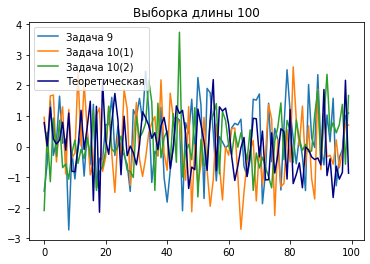

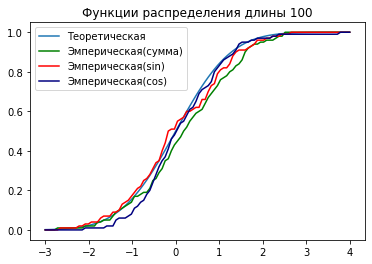

Мат.ожидание N_4: 0.2187447043470452
Мат.ожидание N_4_sin: 0.03982895261721714
Мат.ожидание N_4_cos: 0.12960792189206197
Мат.ожидание N_4_theor: 0.10850420496767885
Медиана N_4: 0.18011585206160508
Медиана N_4_sin: -0.17501293084004407
Медиана N_4_cos: 0.019064985569528736
Медиана N_4_theor: 0.017642297215816456
Дисперсия N_4: 1.2102976737983577
Дисперсия N_4_sin: 1.2231829576183977
Дисперсия N_4_cos: 0.8549480662889081
Дисперсия N_4_theor: 0.8722403176511021
К.асимметрии N_4: -0.12471886140251426
К.асимметрии N_4_sin: 0.025563248224867437
К.асимметрии N_4_cos: 0.6187723729326767
К.асимметрии N_4_theor: 0.0818589166619028
К.эксцесса N_4: -0.4312021314146079
К.эксцесса N_4_sin: -0.4674819768540365
К.эксцесса N_4_cos: 1.4427632008089102
К.эксцесса N_4_theor: -0.6113519183914893


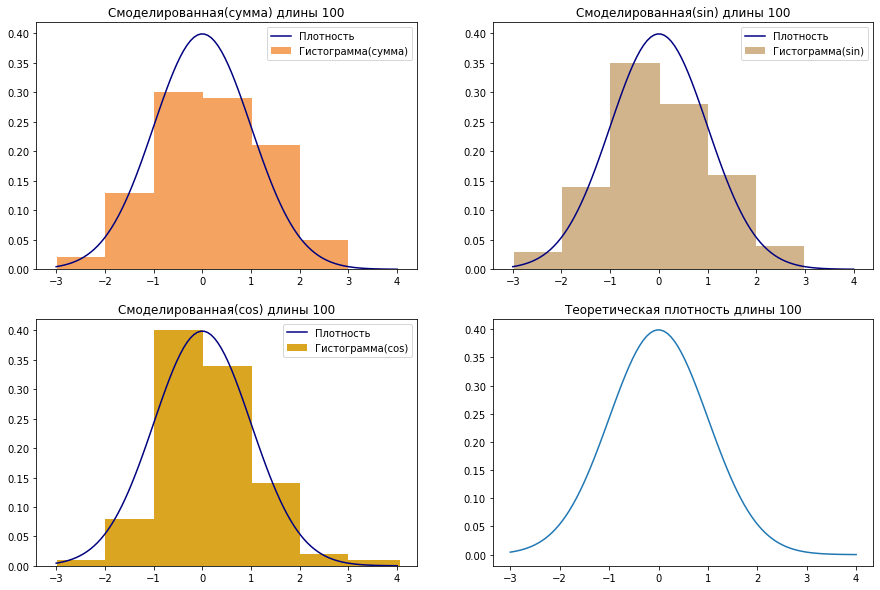

In [15]:
Task4()

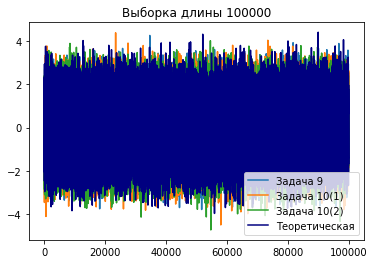

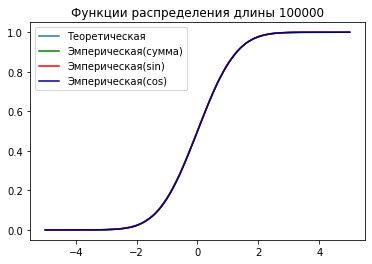

Мат.ожидание N_4: -0.0019522908147930323
Мат.ожидание N_4_sin: -0.004014540680797727
Мат.ожидание N_4_cos: 0.00179636610155079
Мат.ожидание N_4_theor: 0.0027228052789578573
Медиана N_4: -0.0031417999044860423
Медиана N_4_sin: -0.004345009109804569
Медиана N_4_cos: 0.0008087307290866798
Медиана N_4_theor: 0.001724396990875462
Дисперсия N_4: 1.0057484030245099
Дисперсия N_4_sin: 1.0152688974628585
Дисперсия N_4_cos: 1.0049335866688438
Дисперсия N_4_theor: 1.0055416690542562
К.асимметрии N_4: 0.0009240979404573401
К.асимметрии N_4_sin: -0.00521335244908029
К.асимметрии N_4_cos: -0.00544533373535248
К.асимметрии N_4_theor: 0.0057521321360724555
К.эксцесса N_4: -0.12351039559732213
К.эксцесса N_4_sin: 0.013414122048783934
К.эксцесса N_4_cos: -0.01360496879734434
К.эксцесса N_4_theor: 0.0040160092628428274


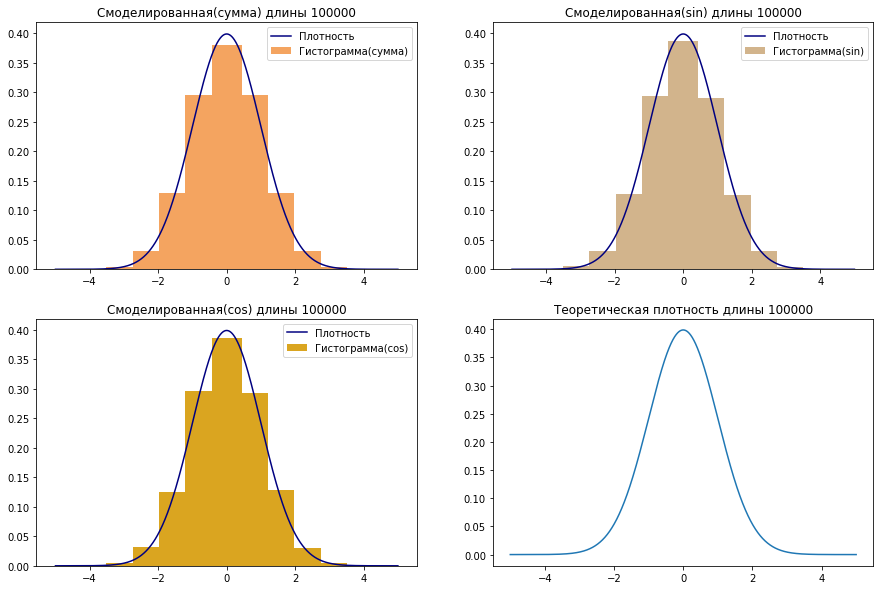

In [16]:
Task4(length = 100000)

# Время генерации

In [32]:
import time

In [33]:
start = time.time()
n_time = N_4()
end = time.time()
print(end - start)

0.0008115768432617188


In [34]:
start = time.time()
n_time_1 = N_4_1()
end = time.time()
print(end - start)

0.0004260540008544922


In [35]:
start = time.time()
n_time_2 = N_4_2()
end = time.time()
print(end - start)

0.00045609474182128906


In [36]:
start = time.time()
n_time = N_4(10000000)
end = time.time()
print(end - start)

1.077580213546753


In [37]:
start = time.time()
n_time_1 = N_4_1(10000000)
end = time.time()
print(end - start)

0.4227886199951172


In [38]:
start = time.time()
n_time_2 = N_4_2(10000000)
end = time.time()
print(end - start)

0.41922783851623535


----
# Задание 2
----

## Равномерное распределение(Задание 4)

Случайная величина X ~ R[a, b]. Пусть a = 2, b = 5.

In [10]:
def R_moments(mas):
    x_mean = mas.sum()/len(mas)
    disp_mas = (mas - x_mean)**2
    x_disp = disp_mas.sum()/(len(disp_mas)-1)
    a = x_mean - np.sqrt(3*x_disp)
    b = x_mean + np.sqrt(3*x_disp)
    print('R[' + str(a)+', '+str(b)+']')

### Выборка длины 100

In [11]:
mas = np.random.uniform(low = 2.0, high = 5.0, size = (100))

In [12]:
R_moments(mas)

R[1.9324522786552465, 5.143832231571253]


### Выборка длины 100000

In [13]:
mas = np.random.uniform(low = 2.0, high = 5.0, size = (100000))

In [14]:
R_moments(mas)

R[2.000739652113247, 5.0031579304426455]


## Экспоненциальное и сдвинутое экспоненциальное распределение(Задание 5)

Случайная величина X ~ Exp($\lambda$). Пусть $\lambda = 5 = \frac{1}{\beta}, \beta$ - параметр np.random.exponential()

In [16]:
def Exp_moments(mas): #Экспоненциальное
    x_mean = mas.sum()/len(mas)
    l = 1/x_mean
    print('Exp[' + str(l) + ']')

### Выборка длины 100

In [23]:
# scale == beta
exp = np.random.exponential(scale = 1/5, size = (100))

In [24]:
Exp_moments(exp)

Exp[4.452551487118613]


### Выборка длины 100000

In [25]:
exp = np.random.exponential(scale = 1/5, size = (100000))

In [26]:
Exp_moments(exp)

Exp[4.974561792226967]


### Эскпоненциальное распределение со сдвигом

X ~ Exp($\lambda$, $x_0$). Пусть $\lambda = 5; x_0 = 3$.

In [58]:
lambda_0 = 5
x_0 = 3

#### Смоделируем распределение и покажем его эмперическое распределение

In [43]:
def exp(l, x0, size = 100):
    return 1/l * np.log(1/(1-np.random.uniform(size = (size)))) + x0

In [65]:
teor_exp = lambda x:  1 - np.exp(-lambda_0*(x-x_0))

In [66]:
def emper(x, c):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        #for i in range(len(c)):
        tmp = c < x[j]
        ans[j] = tmp.sum()
            #if x[j] > c[i]:
            #    ans[j] += 1
    
    ans = ans/len(ans)
    return ans

In [67]:
exp1 = exp(5, 3)
exp2 = exp(5, 3, size = 100000)

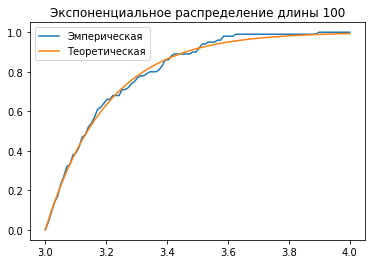

In [68]:
x = np.linspace(start = 3, stop = 4, num = 100)
plt.plot(x, emper(x, exp1))
plt.plot(x, teor_exp(x))
plt.legend(["Эмперическая", "Теоретическая"])
plt.title("Экспоненциальное распределение длины 100")
plt.savefig("./Task_2_2/Exp_100.png")

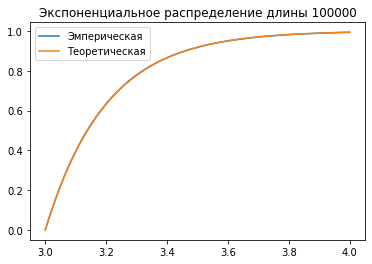

In [179]:
x = np.linspace(start = 3, stop = 4, num = 100000)
plt.plot(x, emper(x, exp2))
plt.plot(x, teor_exp(x))
plt.legend(["Эмперическая", "Теоретическая"])
plt.title("Экспоненциальное распределение длины 100000")
plt.savefig("./Task_2_2/Exp_100000.png")

#### Метод моментов

In [70]:
def Exp_moments1(mas): #Сдвинутое экспоненциальное
    x_mean = mas.sum()/len(mas)
    disp_mas = (mas - x_mean)**2
    x_disp = disp_mas.sum()/(len(disp_mas)-1)
    
    l = 1/np.sqrt(x_disp)
    x_0 = x_mean - 1/l
    print('Exp[' + str(l) + ', ' + str(x_0) + ']')

In [72]:
Exp_moments1(exp1)

Exp[5.625025698971059, 3.0159937655655447]


In [73]:
Exp_moments1(exp2)

Exp[4.9870433076067355, 2.9991436233274964]


## Распределение Коши(Задание 6)

X ~ C($x_0, \gamma$). Пусть $\gamma = 1.5$, $x_0 = 5$

In [74]:
gamma = 1.5
x_0_6 = 5

### Смоделируем преобразованное распределение Коши с заданными параметрами

In [75]:
def C_t(size = 100, x_0 = x_0_6, gamma = gamma):
    return x_0 + gamma * np.tan(np.pi * (np.random.uniform(size = size) - 1/2))

In [76]:
cau1 = C_t()

In [249]:
cau2 = C_t(size = 10000)

In [ ]:
def emper(x, c):
    ans = np.zeros_like(c)
    for j in range(len(ans)):
        tmp = c < x[j]
        ans[j] = tmp.sum()
    
    ans = ans/len(ans)
    return ans

### Плотность

In [148]:
# Гистограмма
def hc(x, n_c, result, mas, n):
    ans = 0
    for j in range(n_c):
        if x <= mas[j+1] and x > mas[j]:
            ans += result[j] / (mas[j+1] - mas[j])
    ans /= n
    return ans

In [80]:
def n(N = 100):
    #return int(np.sqrt(N))
    return min(1 + int(np.log2(N)), 13) #правило Стерджиса: n = 1+[log2N]

### Метод моментов
Используем медиану выборки, затем подставим значение в формулу гистограммы, оценивающую плотность. Так как $f(x_0) = \frac{1}{\pi\gamma}$, получим, что $h(x_0) = f(x_0) => \gamma = \frac{1}{\pi h(x_0)}$

In [228]:
def Cauch_moments(inp):
    median = np.sort(inp)[int(len(inp)/2) - 1]
    
    start = int(inp.min()) - 1
    stop = int(inp.max()) + 1
    x = np.linspace(start= start, stop=stop, num=len(inp))

    if(len(inp) <= 100):
        n_c = 150
    else:
        n_c = 1000
    hist_len = (x.max() - x.min())/(n_c)
    mas = np.zeros((n_c+1))

    for i in range(n_c):
        mas[i] = x.min() + hist_len*i
    mas[n_c] = x.max()
    
    result = np.zeros((n_c))
    c = inp
    for i in range(len(c)):
        for j in range(n_c):
            if c[i] <= mas[j+1] and c[i] > mas[j]:
                result[j] += 1
    
    fx = lambda x: 1/np.pi * 1.5/((x - 5)**2 + 2.25)
    plt.plot(x, h1(x, n_c, result, mas))
    plt.plot(x, fx(x))
    sum = 0;
    for i in range(len(inp)):
        sum += hc(inp[i], n_c, result, mas, len(c))
    sum /= len(inp)
    gamma = 1/(np.pi*hc(median, n_c, result, mas, len(c)))
    print("C(" + str(median) + ", " + str(gamma) + ')')
    plt.legend(["Гистограмма", "Плотность"])
    plt.title("Распределение Коши длины " + str(len(inp)))
    plt.savefig("./Task_2_3/Cauch_"+str(len(inp))+".png")

C(4.750004117181387, 1.3606187291777851)


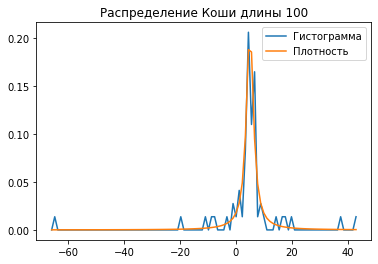

In [226]:
Cauch_moments(cau1)

C(4.98376276044115, 2.643928460393461)


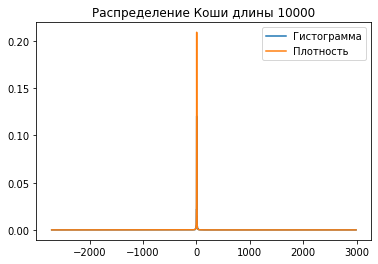

In [250]:
Cauch_moments(cau2)

----

# Задание 3(Метод наименьших квадратов)

----

## Задача 4.7

Моделируем наблюдения:

$X_i = \beta_1+\beta_2*t_i+\epsilon_i, i = 1, ..., n, n = 100, t_i = \frac{2i}{n}, \beta_1=2, \beta_2=1, \epsilon_i \in \mathbb{R}[-1,386; 1,386]$

In [2]:
def X_i(n = 100):
    x = np.zeros((n))
    beta1 = 2
    beta2 = 1
    eps = np.random.uniform(low = -1.386, high = 1.386, size = (n))
    
    for i in range(n):
        x[i] = beta1 + beta2*(2*(i+1))/n + eps[i]
    
    return x

Определение оценок наименьших квадратов параметров $\beta_1, \beta_2$

$X = F\times\beta+\epsilon$, $F = (1, t)$

$\widetilde{\beta} = (F^T\times F)^-1 \times F^TX$

In [3]:
def t_gen(n = 100):
    t = np.zeros((n))
    for i in range(n):
        t[i] = 2*(i+1)/n
    return t

In [4]:
def F_construct(n = 100):
    F = np.zeros((n, 2))
    for i in range(n):
        F[i, 0] = 1
        F[i, 1] = 2*(i+1)/n
    return F

In [5]:
def LSE(n = 100, X_i = X_i()):
    F = F_construct(n)
    
    ans = np.dot(F.T, F)
    ans = np.linalg.inv(ans)
    ans = np.dot(ans, F.T)
    ans = np.dot(ans, X_i)
    return ans

Построение графика функции $x(t) = 2 + t$, $\widetilde{x}(t) = \widetilde{\beta_1}+\widetilde{\beta_2}t$ и отметка точек $(t_i, X_i)$

In [6]:
def truth(t):
    return 2+t
def LSM(n = 100, X_i = X_i()):
    b = LSE(n = n, X_i = X_i)
    return np.dot(F_construct(), b.T)

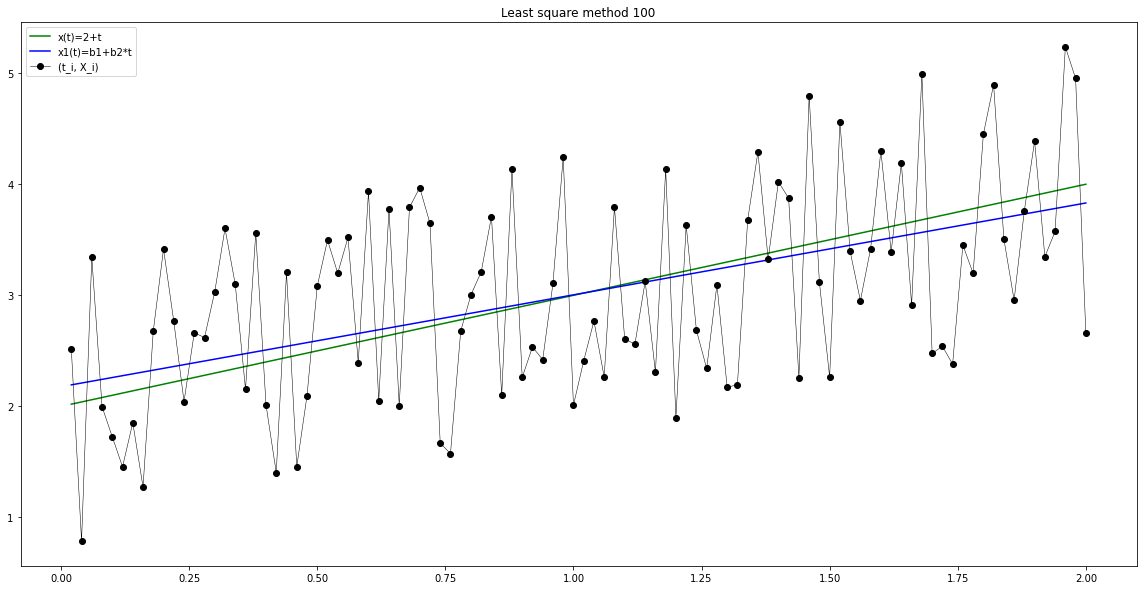

In [7]:
t = t_gen()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(t, truth(t), color = 'g')
plt.plot(t, LSM(), color='b')
plt.plot(t, X_i(), color='k', marker = 'o', linewidth = 0.5)
plt.legend(["x(t)=2+t", "x1(t)=b1+b2*t", "(t_i, X_i)"])
plt.title("Least square method " + str(len(t)))

plt.savefig("./Task_3_1/LSM_uniform_"+str(len(t))+".png")

## Задача 4.8

Данные из задачи 4.7, но $\epsilon_i\in \mathbb{N}(0, \sigma^2), \sigma^2 = 0.16$

In [8]:
def new_X_i(n = 100):
    x = np.zeros((n))
    beta1 = 2
    beta2 = 1
    eps = np.random.normal(loc = 0, scale = 0.4, size = (n))
    
    for i in range(n):
        x[i] = beta1 + beta2*(2*(i+1))/n + eps[i]
    
    return x

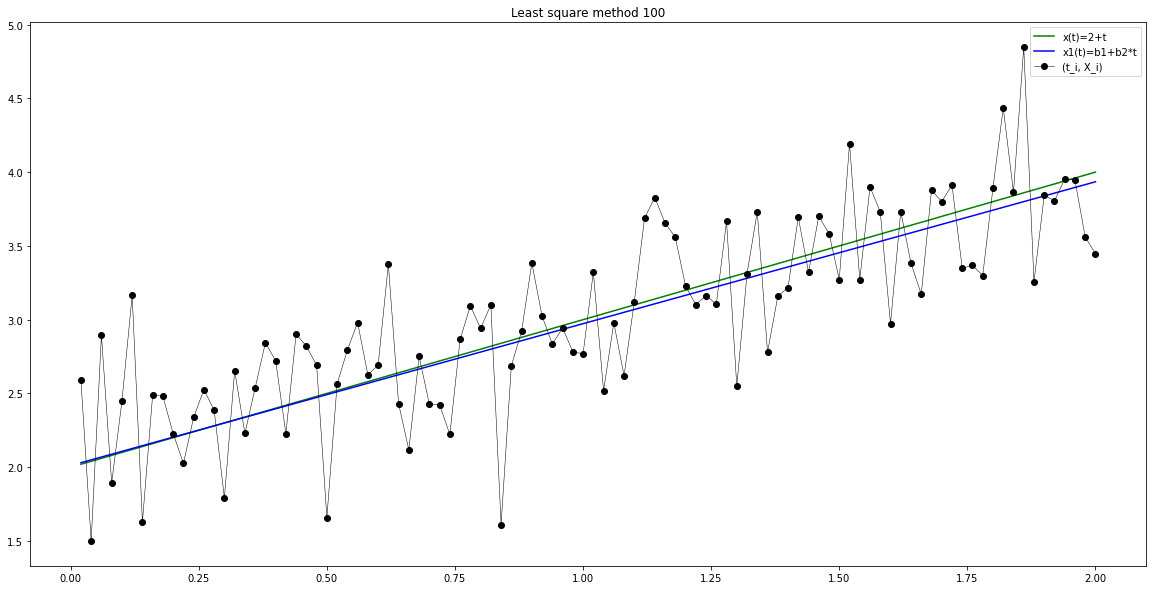

In [9]:
t = t_gen()
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(t, truth(t), color = 'g')
plt.plot(t, LSM(X_i = new_X_i()), color='b')
plt.plot(t, new_X_i(), color='k', marker = 'o', linewidth = 0.5)
plt.legend(["x(t)=2+t", "x1(t)=b1+b2*t", "(t_i, X_i)"])
plt.title("Least square method " + str(len(t)))

plt.savefig("./Task_3_1/LSM_normal_"+str(len(t))+".png")

## Дополнительная задача

Данные из задачи 4.7, но $\epsilon_i\in \mathbb{L}(0, \sigma^2), \sigma^2 = 0.16$

Построить оценки параметров МНК и МНМ. Вычислить для них сумму квадратов невязок и сумму модулей невязок. 
Построить график, содержащий наблюдения, истинную регрессию и ее оценки, полученные с помощью МНК и МНМ.